In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy.matlib
import os as os
import scipy.io as sio
import numpy as np
from FTools.fang_plot import *
from pysit.util.util import *
from pysit.util.compute_tools import *
import tensorflow as tf


In [2]:
def savefig(name):
    plt.savefig(name + '.pdf')
    plt.savefig(name + '.eps')
    plt.savefig(name + '.png')

In [28]:
HOME = os.getenv('HOME');
# FigureRootDir = HOME + '/Dropbox (MIT)/Project/PaperToSub/Journal/FWIPE/ExxonPaper/fig'
FigureRootDir = HOME + '/Dropbox_MIT/Project/PaperToSub/Journal/FWIPE/ExxonPaper/fig'
FigureSubDir = '/Marmousi/StartingFrequencyWRI'

if not os.path.exists(FigureRootDir+FigureSubDir):
    os.makedirs(FigureRootDir+FigureSubDir, exist_ok=True)



In [4]:
def load_model(file):
    A = sio.loadmat(file)
    vel = A['data']
    o = A['o']
    d = A['d']
    n = A['n']
    o = o[0]
    d = d[0]
    n = n[0]
    
    return vel, o, d, n
    

In [5]:
os.listdir(HOME + '/Dropbox_MIT')

['.bash_profile',
 '.dropbox',
 '.dropbox.cache',
 '.DS_Store',
 '1AShanPic',
 '2019-04-13 波士顿清华校友会年会',
 '20200506.parquet',
 '84C0C045-9039-49BB-9B37-FADA0FF33FA6.pdf',
 'AdvancedGeophysics',
 'AliCmp',
 'ArthurLPC',
 'BP2014',
 'Data',
 'DataForYimin',
 'ExpPeriod201907',
 'Exxon-Paper',
 'GANTOMO',
 'Get Started with Dropbox Paper.url',
 'Get Started with Dropbox.pdf',
 'Icon\r',
 'install_petsc4py_OSx_3.6.0.sh',
 'install_petsc4py_OSx_3.9.1.sh',
 'kaikai',
 'Kinder',
 'LiftingPaper',
 'MentoringProgram',
 'MIT',
 'MSML2020',
 'PaperShare',
 'Project',
 'Python_Note',
 'Receipt',
 'ResultFigToShow',
 'ResultFromTH',
 'Rixi',
 'Script',
 'SEG2020Zhilong',
 'Sell',
 'slides-Exxon-meetings',
 'Softerware',
 'Sync',
 'UBC',
 'wikis',
 'Yilmaz_book',
 'ZhilongFigure',
 '亮懿堂',
 '口算3.jpeg',
 '老婆要得东西',
 '马马熊成长记 2-HD (1080p).m4v']

## Starting Frequency
### Models

In [6]:
# ResultDirSF = HOME + '/Dropbox (MIT)/ResultFromTH/ExxonProject/MarmousiModel/Result/ExpPeriod201907/StartFrequencyCompare'
ResultDirSF = HOME + '/Dropbox_MIT/ResultFromTH/ExxonProject/MarmousiModel/Result/ExpPeriod201907/StartFrequencyCompare'

#### Load models

In [38]:
STR1 = ['LS', 'EI', 'OTL', 'OTE']
Dicts = ['2_3_4_3', '2_4_4_4', '2_5_4_5', '2_6_4_6', '2_7_4_7', '2_8_4_8', '2_9_4_9', '3_5', '3_5_5_5']
Dicts2 = ['2.3 Hz', '2.4 Hz', '2.5 Hz', '2.6 Hz', '2.7 Hz', '2.8 Hz', '2.9 Hz', '3.0 Hz', '3.5 Hz']
Models = dict()

for i in range(len(STR1)):
    modelsi = dict()
    for j in range(len(Dicts)):
        if i!=1:
            str = '/' + STR1[i] + '_Result/' + STR1[i] + '_BoxConstraint_Starting' + Dicts[j] + 'Hz_CorrectBox_Wolfe/result.mat'
        else:
            str = '/' + STR1[i] + 'P1_Result/' + STR1[i] + 'P1_StartFreq' + Dicts[j] + 'Smooth1500_dx20_CorrectBox_50EI/result.mat'
        file_name = ResultDirSF + str
        if os.path.exists(file_name):
            vel, o, d, n = load_model(file_name)
            modelsi[Dicts[j]] = vel
        else:
            modelsi[Dicts[j]] = None
            
        Models[STR1[i]] = modelsi         
            

#### Plot Models

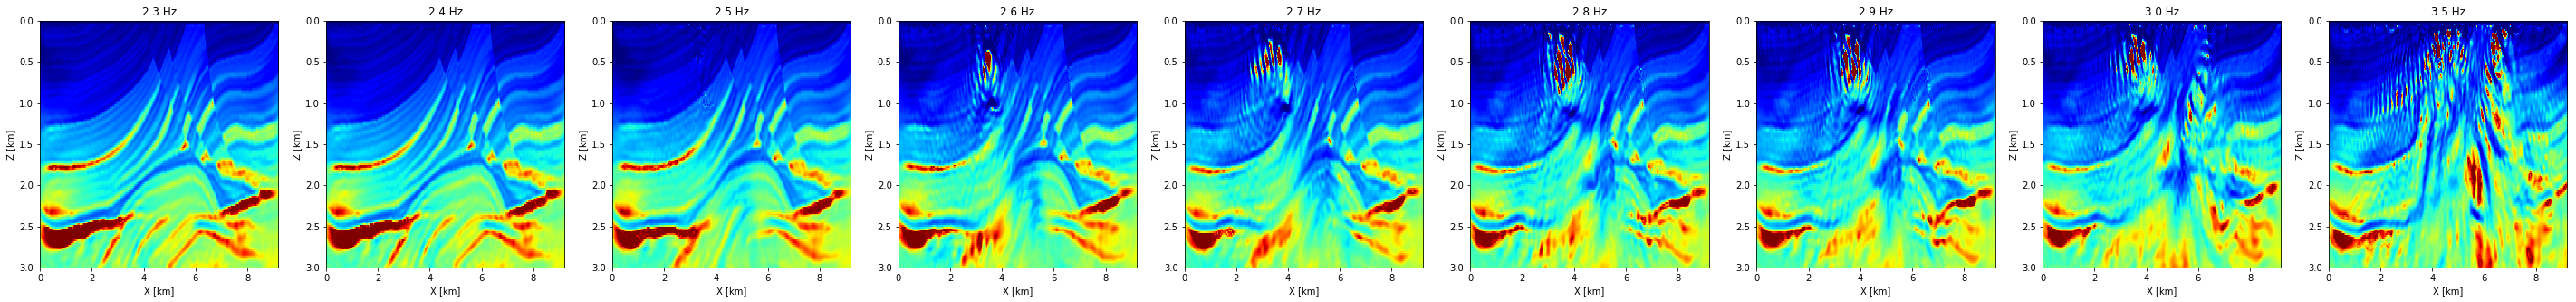

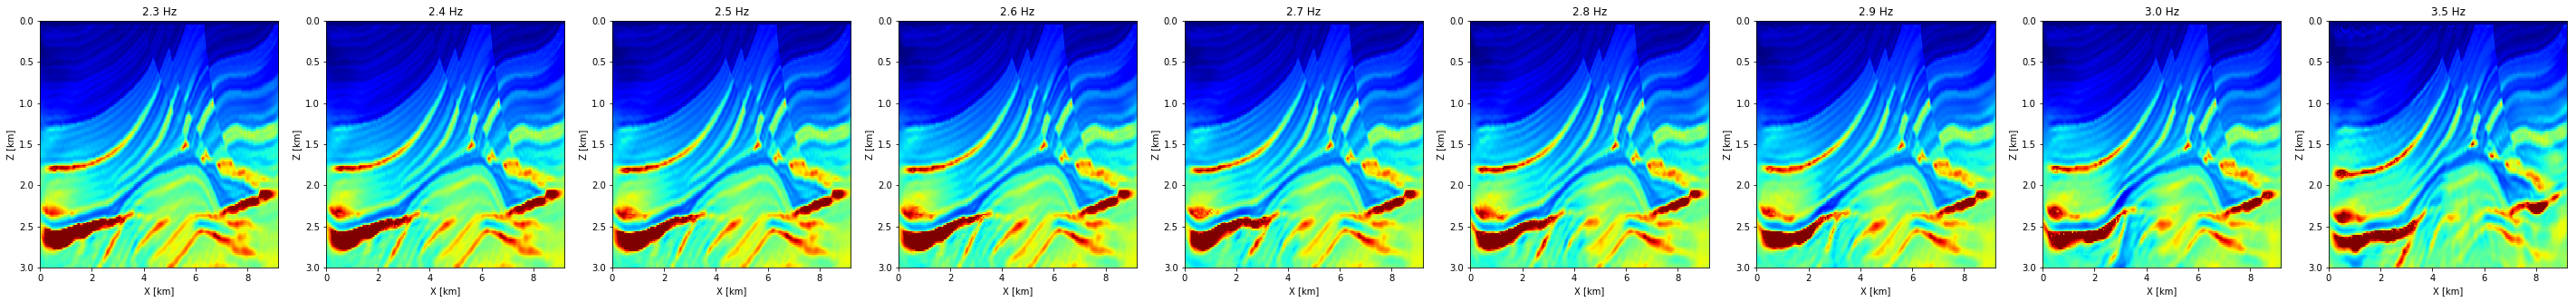

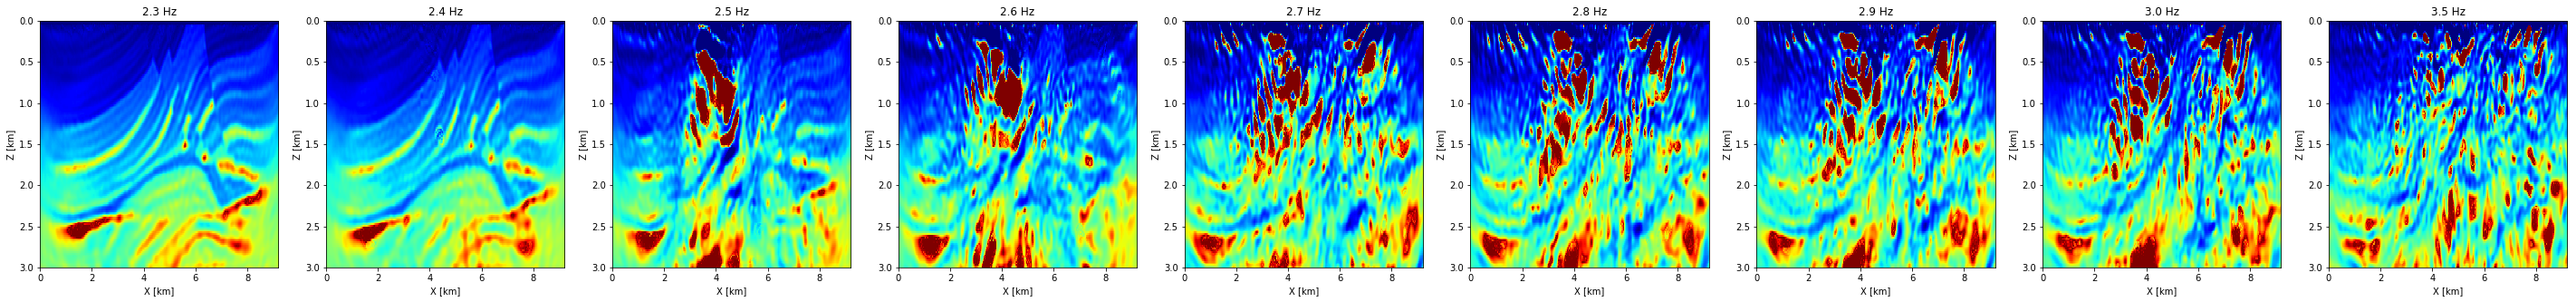

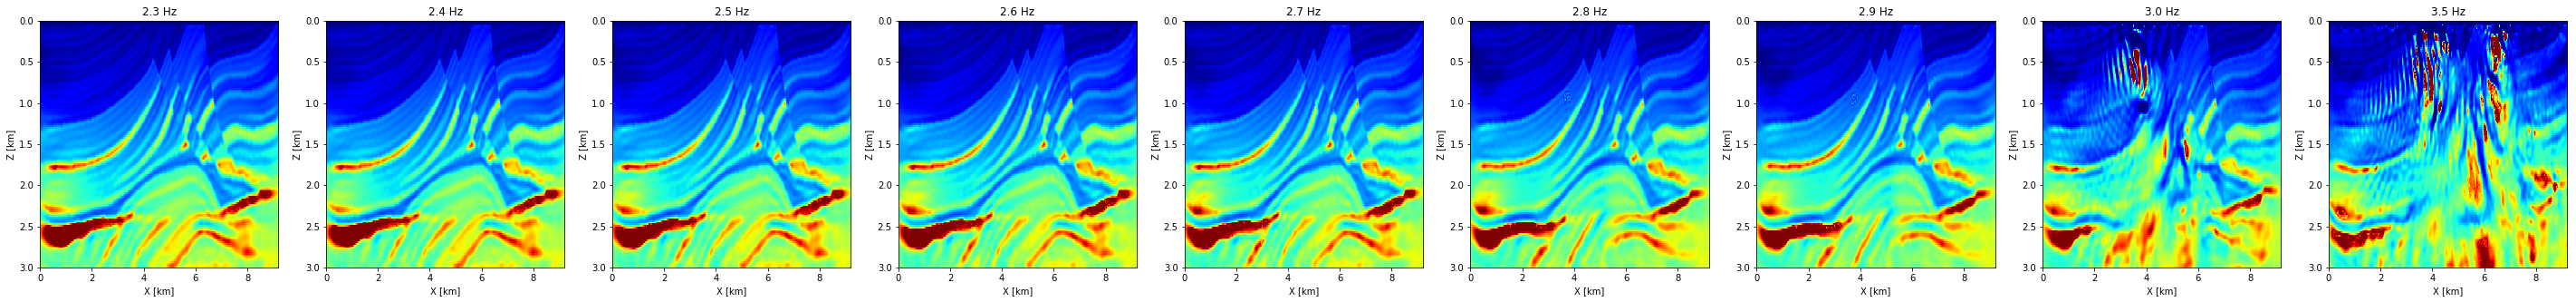

In [8]:
clim_vel = [1.5, 5.5]
output = odn2grid(o,d,n)
zaxis = output[0]
xaxis = output[1]
X_plot = np.zeros(n)
for i in range(n[0]):
    X_plot[i, i+145] = 1.0
    X_plot[i, i+146] = 1.0
    X_plot[i, i+147] = 1.0
    X_plot[i, i+148] = 1.0
    X_plot[i, i+149] = 1.0
    X_plot[i, 461-145-i] = 1.0
    X_plot[i, 461-144-i] = 1.0
    X_plot[i, 461-143-i] = 1.0
    X_plot[i, 461-142-i] = 1.0
    X_plot[i, 461-141-i] = 1.0
    
for i in range(len(STR1)):
    fig, ax = plt.subplots(1,len(Dicts),figsize=(50,5))
    for j in range(len(Dicts)):
        if Models[STR1[i]][Dicts[j]] is not None:
            imagesc(Models[STR1[i]][Dicts[j]], Lateral=xaxis, Depth=zaxis, clim=clim_vel, title_str=Dicts2[j], 
                    xlabel='X [km]', ylabel='Z [km]', cmap='jet', ax=ax[j], fig=fig, colorbar=False)
        else:
            imagesc(X_plot, Lateral=xaxis, Depth=zaxis, clim=[-0.5,0.5], title_str=Dicts2[j], 
                    xlabel='X [km]', ylabel='Z [km]', cmap='jet', ax=ax[j], fig=fig, colorbar=False)
    FigureFile = FigureRootDir+FigureSubDir+'/SFModels_' + STR1[i]
#     plt.savefig(FigureFile + '.pdf', bbox_inches='tight')
#     plt.savefig(FigureFile + '.png', bbox_inches='tight')
#     plt.savefig(FigureFile + '.eps', bbox_inches='tight')
#     plt.close(fig)
    

#### Plot Model errors

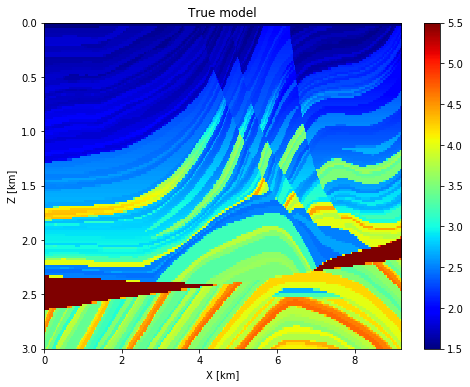

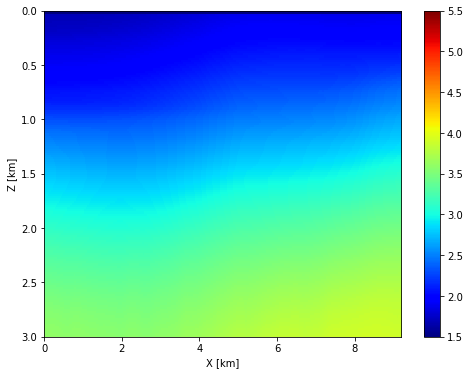

In [93]:
vtrue_file = ResultDirSF + '/true.mat'
vini_file = ResultDirSF + '/initial.mat'
vt, o, d, n = load_model(vtrue_file)
vi, o, d, n = load_model(vini_file)
PaperSizeModel = [8,6]
fig, ax = plt.subplots(1,1,figsize=PaperSizeModel)
imagesc(vt, Lateral=xaxis, Depth=zaxis, clim=clim_vel, title_str='True model', 
                    xlabel='X [km]', ylabel='Z [km]', cmap='jet', ax=ax, fig=fig)
FigureFile = FigureRootDir+FigureSubDir+'/Marmousi_true'
# plt.savefig(FigureFile + '.pdf', bbox_inches='tight')
# plt.savefig(FigureFile + '.png', bbox_inches='tight')
# plt.savefig(FigureFile + '.eps', bbox_inches='tight')

fig, ax = plt.subplots(1,1,figsize=PaperSizeModel)
imagesc(vi, Lateral=xaxis, Depth=zaxis, clim=clim_vel, title_str='', 
                    xlabel='X [km]', ylabel='Z [km]', cmap='jet', ax=ax, fig=fig)
FigureFile = FigureRootDir+FigureSubDir+'/Marmousi_initial'
# plt.savefig(FigureFile + '.pdf', bbox_inches='tight')
# plt.savefig(FigureFile + '.png', bbox_inches='tight')
# plt.savefig(FigureFile + '.eps', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

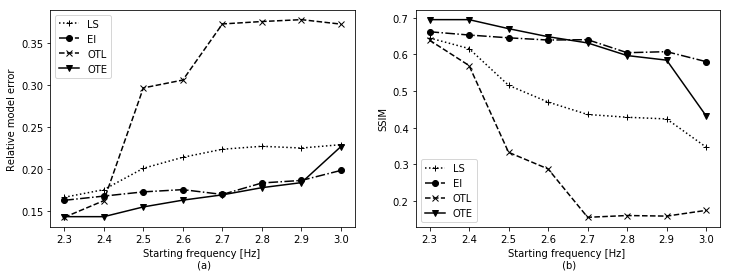

In [10]:
ModelErrors = dict()
freqs = np.linspace(2.3, 3.0, 8)
plt.figure()
Markers = ['+', 'o', 'x', 'v']
LineStyles = [':', '-.', '--', '-']
fig, ax = plt.subplots(1,2,figsize=[12,4])
MSSIMs = []
vt = vt.astype('float32')
vt_tf = tf.convert_to_tensor(vt)
vt_tf = tf.reshape(vt_tf, [n[0],n[1],1])
for i in range(len(STR1)):
    Obj = list()
    freq = list()
    MSSIMis = []
    for j in range(len(freqs)):
        if Models[STR1[i]][Dicts[j]] is not None:
            ME_i = (np.linalg.norm(np.array(Models[STR1[i]][Dicts[j]]) - np.array(vt))) / np.linalg.norm(np.array(vt))
            vf = Models[STR1[i]][Dicts[j]]
            vf = vf.astype('float32')
            vf_tf = tf.convert_to_tensor(vf)
            vf_tf = tf.reshape(vf_tf, [n[0],n[1],1])
            ssim_val1 = tf.image.ssim(vt_tf,vf_tf,max_val=3.5)
            Obj.append(ME_i)
            freq.append(freqs[j])
            MSSIMis.append(ssim_val1)
            
    ax[0].plot(freq,Obj, label=STR1[i], marker=Markers[i], color='black', linestyle=LineStyles[i])
    ax[1].plot(freq,MSSIMis, label=STR1[i], marker=Markers[i], color='black', linestyle=LineStyles[i])
    
ax[0].set_xlabel('Starting frequency [Hz] \n (a)')
ax[1].set_xlabel('Starting frequency [Hz] \n (b)')
ax[0].set_ylabel('Relative model error')
ax[1].set_ylabel('SSIM')
ax[0].legend()
ax[1].legend()
FigureFile = FigureRootDir+FigureSubDir+'/Marmousi_SF_ModelError'
# plt.savefig(FigureFile + '.pdf', bbox_inches='tight')
# plt.savefig(FigureFile + '.png', bbox_inches='tight')
# plt.savefig(FigureFile + '.eps', bbox_inches='tight')



<Figure size 432x288 with 0 Axes>

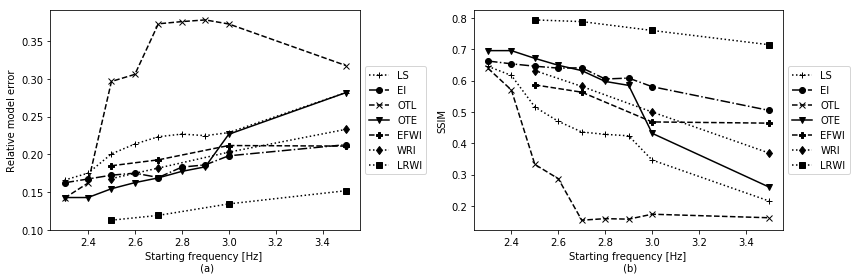

In [89]:
Dicts = ['2_3_4_3', '2_4_4_4', '2_5_4_5', '2_6_4_6', '2_7_4_7', '2_8_4_8', '2_9_4_9', '3_5', '3_5_5_5']
Dicts2 = ['2.3 Hz', '2.4 Hz', '2.5 Hz', '2.6 Hz', '2.7 Hz', '2.8 Hz', '2.9 Hz', '3.0 Hz', '3.5 Hz']
ModelErrors = dict()
freqs2 = np.linspace(2.3, 3.0, 8)
freqs = np.ones(9)*3.5
freqs[0:8] = freqs2
plt.figure()
Markers = ['+', 'o', 'x', 'v']
LineStyles = [':', '-.', '--', '-']
fig, ax = plt.subplots(1,2,figsize=[12,4])
MSSIMs = []
Objs = []
vt = vt.astype('float32')
vt_tf = tf.convert_to_tensor(vt)
vt_tf = tf.reshape(vt_tf, [n[0],n[1],1])
for i in range(4):
    Obj = list()
    freq = list()
    MSSIMis = []
    for j in range(len(freqs)):
        if Models[STR1[i]][Dicts[j]] is not None:
            ME_i = (np.linalg.norm(np.array(Models[STR1[i]][Dicts[j]]) - np.array(vt))) / np.linalg.norm(np.array(vt))
            vf = Models[STR1[i]][Dicts[j]]
            vf = vf.astype('float32')
            vf_tf = tf.convert_to_tensor(vf)
            vf_tf = tf.reshape(vf_tf, [n[0],n[1],1])
            ssim_val1 = tf.image.ssim(vt_tf,vf_tf,max_val=3.5)
            Obj.append(ME_i)
            freq.append(freqs[j])
            MSSIMis.append(ssim_val1)
            
    ax[0].plot(freq,Obj, label=STR1[i], marker=Markers[i], color='black', linestyle=LineStyles[i])
    ax[1].plot(freq,MSSIMis, label=STR1[i], marker=Markers[i], color='black', linestyle=LineStyles[i])
    MSSIMs.append(MSSIMis)
    Objs.append(Obj)
    

    
ResultFileDir = ResultDirSF + '/LS_Extra'    
SubDirs_ex = ['2_5','2_7','3_0','3_5']
Obj = []
MSSIMis = []
for j in range(len(SubDirs_ex)):
    file_name = ResultFileDir + '/' + SubDirs_ex[j] + '/result.mat'
    vel, o, d, n = load_model(file_name)
    ME_i = (np.linalg.norm(np.array(vel) - np.array(vt))) / np.linalg.norm(np.array(vt))
    vf = vel
    vf = vf.astype('float32')
    vf_tf = tf.convert_to_tensor(vf)
    vf_tf = tf.reshape(vf_tf, [n[0],n[1],1])
    ssim_val1 = tf.image.ssim(vt_tf,vf_tf,max_val=3.5)
    Obj.append(ME_i)
    MSSIMis.append(ssim_val1)
MSSIMs.append(MSSIMis)
Objs.append(Obj)
    
ax[0].plot([2.5,2.7,3.0,3.5],Obj, label='EFWI', marker='P', color='black', linestyle='--')
ax[1].plot([2.5,2.7,3.0,3.5],MSSIMis, label='EFWI', marker='P', color='black', linestyle='--')

WRIRankFiles = ['/Users/zhilongfang/Dropbox_MIT/ResultFromTH/ExxonProject/MarmousiModel/Result/ExpPeriod201907/StartFrequencyCompare/WRIandRank/Results_WRI.mat',
                '/Users/zhilongfang/Dropbox_MIT/ResultFromTH/ExxonProject/MarmousiModel/Result/ExpPeriod201907/StartFrequencyCompare/WRIandRank/Results_rank2.mat']

strsWR = ['WRI', 'LRWI']
markers = ['d','s']

for i in range(len(WRIRankFiles)):
    file = WRIRankFiles[i]
    A = sio.loadmat(file)
    Obj = []
    MSSIMis = []
    for j in range(4):
        vel = A['Result'][0,j]
        ME_i = (np.linalg.norm(np.array(vel) - np.array(vt))) / np.linalg.norm(np.array(vt))
        vf = vel
        vf = vf.astype('float32')
        vf_tf = tf.convert_to_tensor(vf)
        vf_tf = tf.reshape(vf_tf, [n[0],n[1],1])
        ssim_val1 = tf.image.ssim(vt_tf,vf_tf,max_val=3.5)
        Obj.append(ME_i)
        MSSIMis.append(ssim_val1)
    MSSIMs.append(MSSIMis)
    Objs.append(Obj)
    
    ax[0].plot([2.5,2.7,3.0,3.5],Obj, label=strsWR[i], marker=markers[i], color='black', linestyle=':')
    ax[1].plot([2.5,2.7,3.0,3.5],MSSIMis, label=strsWR[i], marker=markers[i], color='black', linestyle=':')

    
ax[0].set_xlabel('Starting frequency [Hz] \n (a)')
ax[1].set_xlabel('Starting frequency [Hz] \n (b)')
ax[0].set_ylabel('Relative model error')
ax[1].set_ylabel('SSIM')
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
FigureFile = FigureRootDir+FigureSubDir+'/Marmousi_SF_ModelErrorExtra'
# plt.savefig(FigureFile + '.pdf', bbox_inches='tight')
# plt.savefig(FigureFile + '.png', bbox_inches='tight')
# plt.savefig(FigureFile + '.eps', bbox_inches='tight')


In [90]:
WRIRankFiles = ['/Users/zhilongfang/Dropbox_MIT/ResultFromTH/ExxonProject/MarmousiModel/Result/ExpPeriod201907/StartFrequencyCompare/WRIandRank/Results_WRI.mat',
                '/Users/zhilongfang/Dropbox_MIT/ResultFromTH/ExxonProject/MarmousiModel/Result/ExpPeriod201907/StartFrequencyCompare/WRIandRank/Results_rank2.mat']
STR1 = ['LS', 'EI', 'OTL', 'OTE', 'EFWI', 'WRI', 'LRWI']           
Dicts = ['2_3_4_3', '2_4_4_4', '2_5_4_5', '2_6_4_6', '2_7_4_7', '2_8_4_8', '2_9_4_9', '3_5', '3_5_5_5']
Dicts2 = ['2.3 Hz', '2.4 Hz', '2.5 Hz', '2.6 Hz', '2.7 Hz', '2.8 Hz', '2.9 Hz', '3.0 Hz', '3.5 Hz']
Dicts3 = ['2_5_4_5', '2_7_4_7', '3_5', '3_5_5_5']
Dicts4 = ['2.5 Hz', '2.7 Hz', '3.0 Hz', '3.5 Hz']


# for i in range(len(STR1)):
#     modelsi = dict()
#     for j in range(len(Dicts)):
#         if i!=1:
#             str = '/' + STR1[i] + '_Result/' + STR1[i] + '_BoxConstraint_Starting' + Dicts[j] + 'Hz_CorrectBox_Wolfe/result.mat'
#         else:
#             str = '/' + STR1[i] + 'P1_Result/' + STR1[i] + 'P1_StartFreq' + Dicts[j] + 'Smooth1500_dx20_CorrectBox_50EI/result.mat'
#         file_name = ResultDirSF + str
#         if os.path.exists(file_name):
#             vel, o, d, n = load_model(file_name)
#             modelsi[Dicts[j]] = vel
#         else:
#             modelsi[Dicts[j]] = None
            
#         Models[STR1[i]] = modelsi

Vels2 = []
Strings = ['2.5Hz','2.7Hz','3.0Hz','3.5Hz']
for j in range(len(SubDirs_ex)):
    file_name = ResultFileDir + '/' + SubDirs_ex[j] + '/result.mat'
    vel, o, d, n = load_model(file_name)
    Vels2.append(vel)
modelsi = dict()
for j in range(4):
    modelsi[Dicts3[j]] = Vels2[j]
Models[STR1[4]] = modelsi
                
                
        
for i in range(len(WRIRankFiles)):
    modelsi = dict()
    file = WRIRankFiles[i]
    A = sio.loadmat(file)
    for j in range(4):
        vel = A['Result'][0,j]            
        modelsi[Dicts3[j]] = vel
    Models[STR1[5+i]] = modelsi
            

In [91]:
Models.keys()

dict_keys(['LS', 'EI', 'OTL', 'OTE', 'LS_Extra', 'WRI', 'LRWI', 'LSE', 'EFWI'])

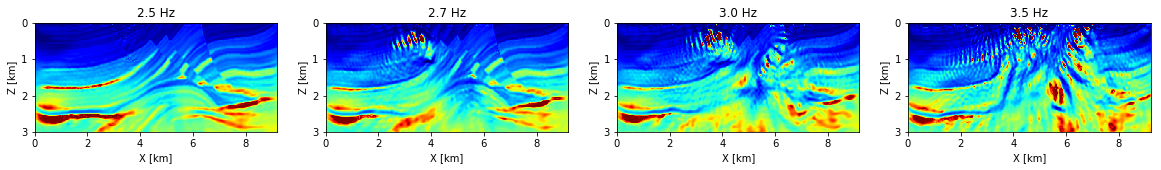

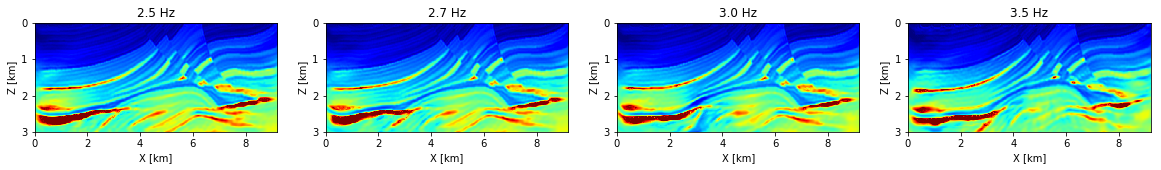

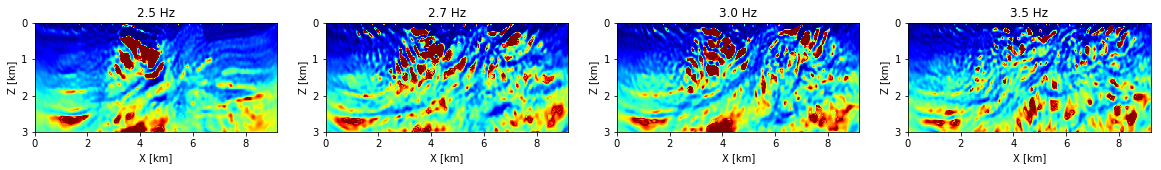

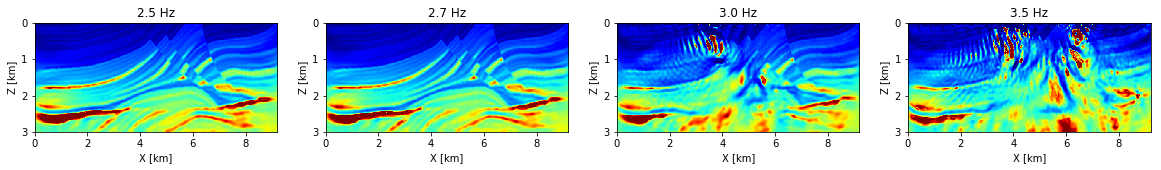

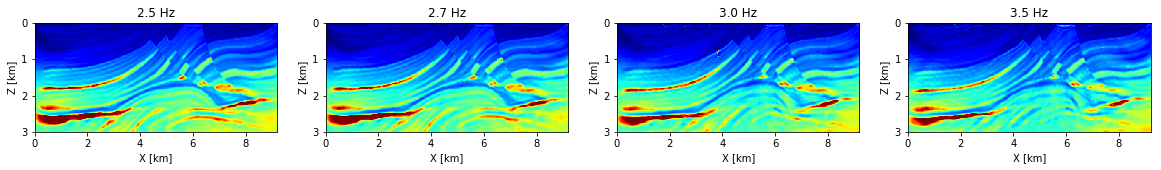

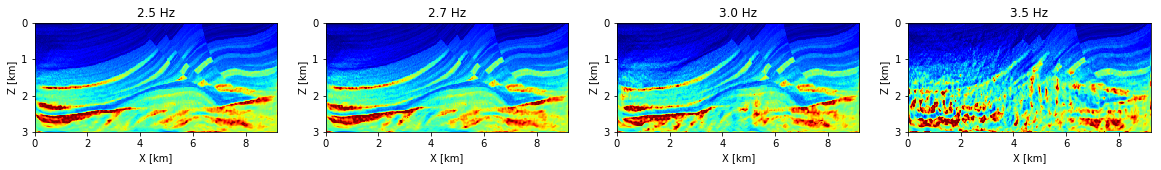

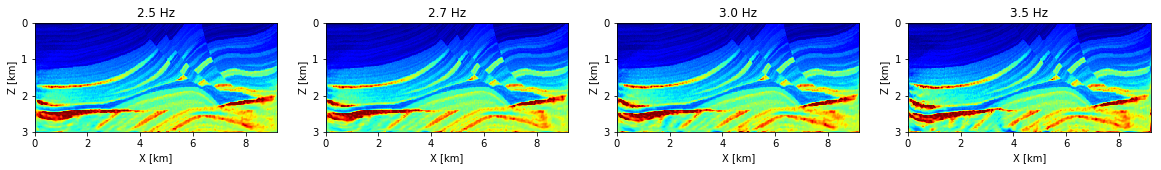

In [53]:
for i in range(len(STR1)):
    fig, ax = plt.subplots(1,len(Dicts3),figsize=(20,2))
    for j in range(len(Dicts3)):
        if Models[STR1[i]][Dicts3[j]] is not None:
            imagesc(Models[STR1[i]][Dicts3[j]], Lateral=xaxis, Depth=zaxis, clim=clim_vel, title_str=Dicts4[j], 
                    xlabel='X [km]', ylabel='Z [km]', cmap='jet', ax=ax[j], fig=fig, colorbar=False)
        else:
            imagesc(X_plot, Lateral=xaxis, Depth=zaxis, clim=[-0.5,0.5], title_str=Dicts2[j], 
                    xlabel='X [km]', ylabel='Z [km]', cmap='jet', ax=ax[j], fig=fig, colorbar=False)
    FigureFile = FigureRootDir+FigureSubDir+'/SFModels_' + STR1[i]
#     plt.savefig(FigureFile + '.pdf', bbox_inches='tight')
#     plt.savefig(FigureFile + '.png', bbox_inches='tight')
#     plt.savefig(FigureFile + '.eps', bbox_inches='tight')

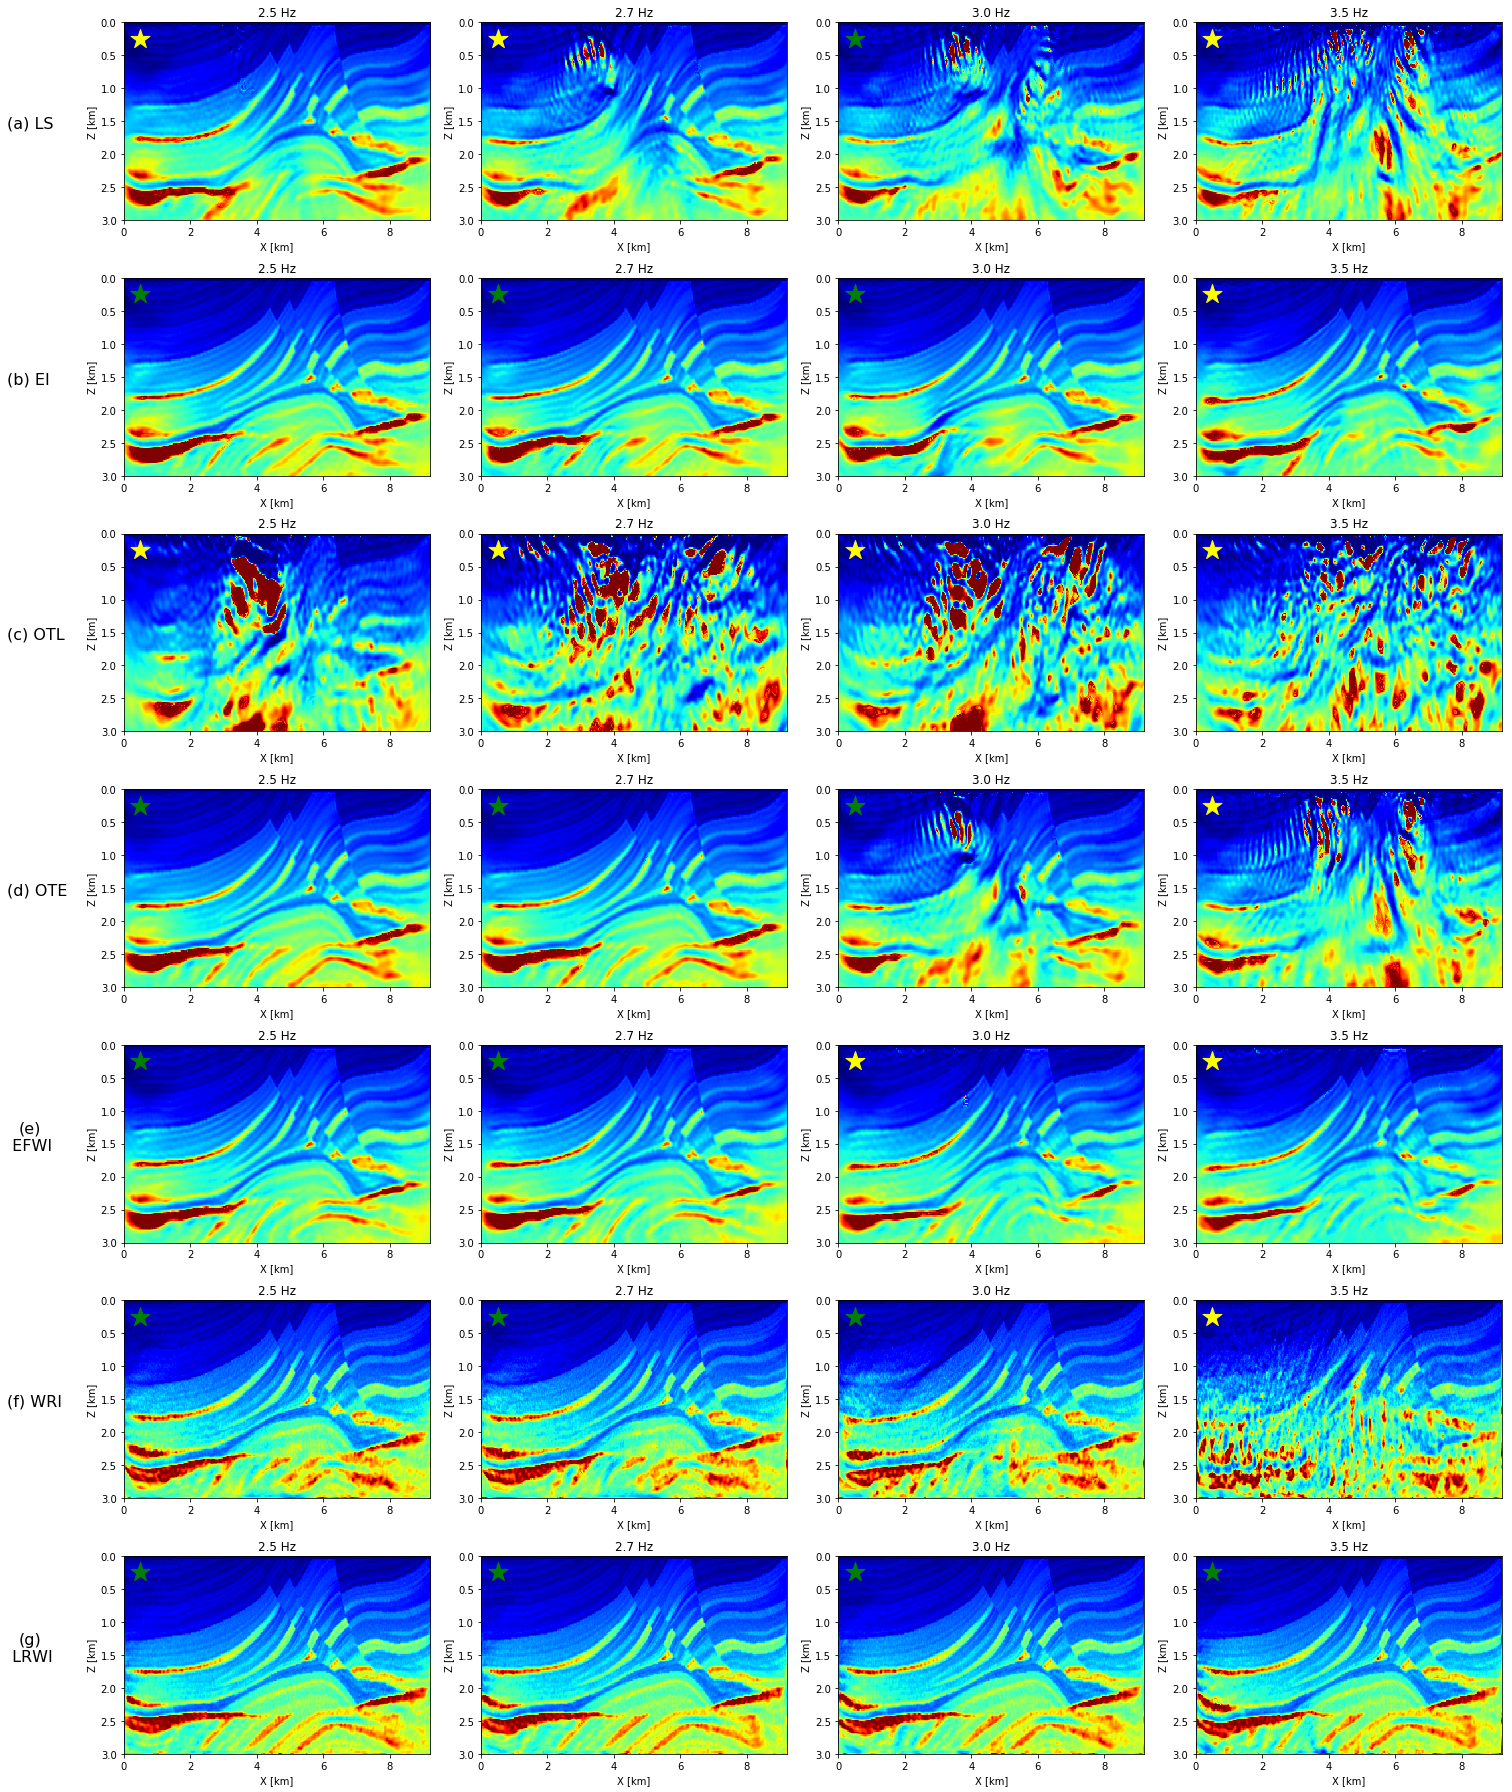

In [99]:
Colors = dict()
Colors['LS'] = ['yellow', 'yellow', 'green', 'yellow']
Colors['EI'] = ['green', 'green', 'green', 'yellow']
Colors['OTL'] = ['yellow', 'yellow', 'yellow', 'yellow']
Colors['OTE'] = ['green', 'green', 'green', 'yellow']
Colors['EFWI'] = ['green', 'green', 'yellow', 'yellow']
Colors['WRI'] = ['green', 'green', 'green', 'yellow']
Colors['LRWI'] = ['green', 'green', 'green', 'green']

fig, ax = plt.subplots(7,len(Dicts3),figsize=(20,25))
strtmp = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)']
for i in range(len(STR1)):
    
    for j in range(len(Dicts3)):
        if j == 0:
            if i!=4 and i!=6:
                stringtmp = strtmp[i] +' '+STR1[i]
            else:
                stringtmp = strtmp[i] +'\n '+STR1[i]
            ax[i][j].text(-3.5, 1.6, stringtmp,fontsize=16,multialignment='center')
        if Models[STR1[i]][Dicts3[j]] is not None:
            imagesc(Models[STR1[i]][Dicts3[j]], Lateral=xaxis, Depth=zaxis, clim=clim_vel, title_str=Dicts4[j], 
                    xlabel='X [km]', ylabel='Z [km]', cmap='jet', ax=ax[i][j], fig=fig, colorbar=False)
        else:
            imagesc(X_plot, Lateral=xaxis, Depth=zaxis, clim=[-0.5,0.5], title_str=Dicts2[j], 
                    xlabel='X [km]', ylabel='Z [km]', cmap='jet', ax=ax[i][j], fig=fig, colorbar=False)
        ax[i][j].scatter(0.5,0.25,s=400,marker='*',color=Colors[STR1[i]][j])
plt.tight_layout()
FigureFile = FigureRootDir+FigureSubDir+'/SFModels_All_fm'
# plt.savefig(FigureFile + '.pdf', bbox_inches='tight')
# plt.savefig(FigureFile + '.png', bbox_inches='tight')
# plt.savefig(FigureFile + '.eps', bbox_inches='tight')
# FigureFile = FigureRootDir+FigureSubDir+'/SFModels_' + STR1[i] + 'fm'


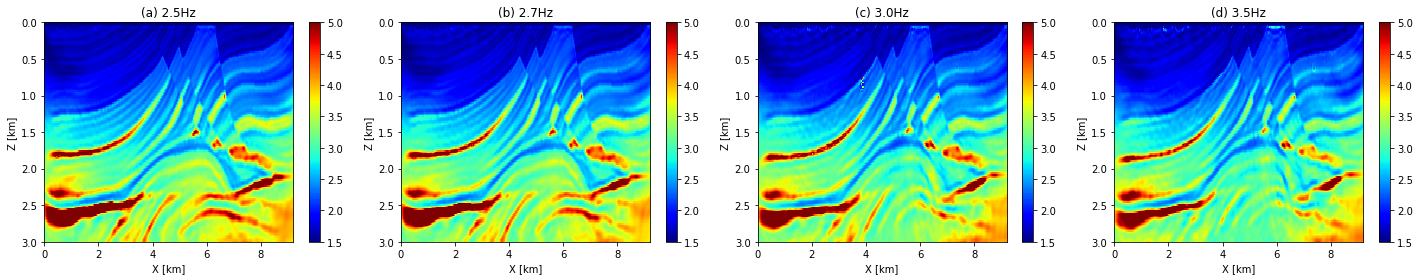

In [16]:
Vels2 = []
Strings = ['2.5Hz','2.7Hz','3.0Hz','3.5Hz']
for j in range(len(SubDirs_ex)):
    file_name = ResultFileDir + '/' + SubDirs_ex[j] + '/result.mat'
    vel, o, d, n = load_model(file_name)
    Vels2.append(vel)

output = odn2grid(o,d,n)
zaxis = output[0]
xaxis = output[1]
clim_vel = [1.5,5]

fig, ax = plt.subplots(1,4,figsize=[20,4])
k = 97
for i in range(len(SubDirs_ex)):
    title_i = '(' + chr(k) + ') ' + Strings[i]
    imagesc(Vels2[i], Lateral=xaxis, Depth=zaxis, clim=clim_vel, title_str=title_i, 
                    xlabel='X [km]', ylabel='Z [km]', cmap='jet', ax=ax[i], fig=fig)
    k += 1
plt.tight_layout()
# FigureFile = FigureRootDir+FigureSubDir+'/Marmousi_Result_Extra'
# savefig(FigureFile)

### Check extrapolated data

In [56]:
DataDir = '/Users/zhilongfang/Dropbox_MIT/ResultFromTH/ExxonProject/Data'
ExtraDatafile = ['/extradata_2_5Hz.mat',
                 '/extradata_2_7Hz.mat',
                 '/extradata_3_0Hz.mat',
                 '/extradata_3_5Hz_batch4.mat']
Datafile      = ['/truedata_2_5Hz.mat',
                 '/truedata_2_7Hz.mat',
                 '/truedata_3_0Hz.mat',
                 '/truedata_3_5Hz_batch4.mat']
filet = DataDir + Datafile[0]
A = sio.loadmat(filet)
datat = A['shot_true']
datat = datai.reshape([3008, 20, 461])
eDatas = []
SNR = []

for i in range(len(ExtraDatafile)):
    efilei = DataDir + ExtraDatafile[i]
    A = sio.loadmat(efilei)
    edatai = A['shot_extra']
    edatai = edatai.reshape([3008, 20, 461])
    snr = np.linalg.norm(datat.flatten())**2.0 / np.linalg.norm(datat.flatten()-edatai.flatten())**2.0
    snr = 10*np.log10(snr)
    eDatas.append(edatai)
    SNR.append(snr)
    

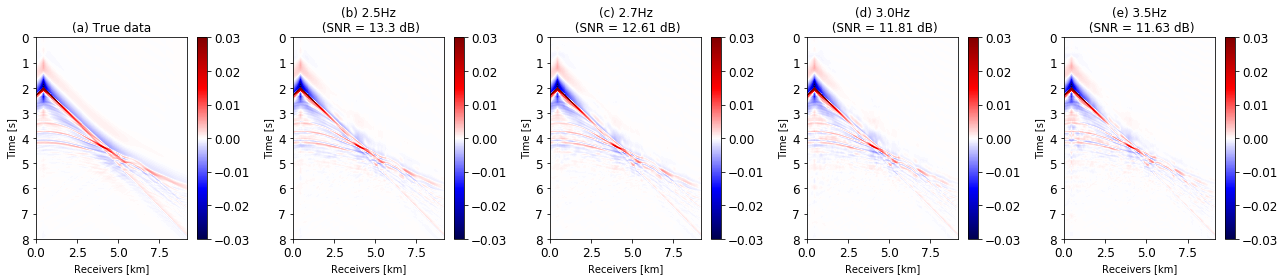

In [75]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
xaxis = [0,9.2]
zaxis = [0, 8]
clim = [-.03,.03]
fig, ax = plt.subplots(1,5,figsize=(18,4))
imagesc(datat[:,0,:], Lateral=xaxis, Depth=zaxis, cmap='seismic', ax=ax[0], fig=fig, clim=clim,
        xlabel='Receivers [km]', ylabel='Time [s]', title_str='(a) True data')
k = 98
for i in range(1,5):
    title_i = '(' + chr(k) + ') ' + Strings[i-1] + '\n (SNR = ' +str(np.round(SNR[i-1],2)) +' dB)'
    imagesc(eDatas[i-1][:,0,:], Lateral=xaxis, Depth=zaxis, cmap='seismic', ax=ax[i], fig=fig, clim=clim,
        xlabel='Receivers [km]', ylabel='Time [s]', title_str=title_i)
    k += 1
plt.tight_layout()
# FigureFile = FigureRootDir+FigureSubDir+'/Marmousi_Data_Extra'
# savefig(FigureFile)



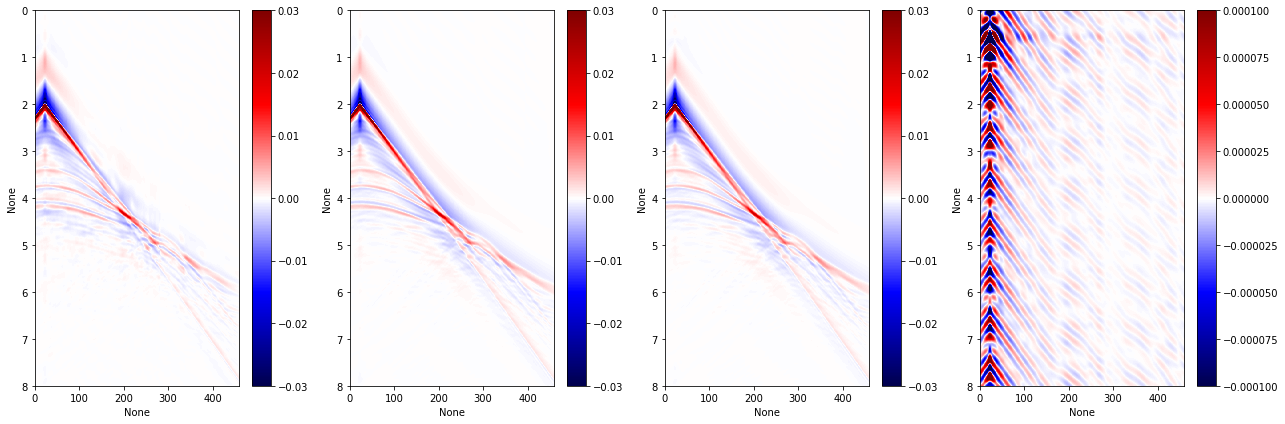

In [53]:
xaxis = [0,460]
zaxis = [0, 8]
clim = [-.03,.03]
fig, ax = plt.subplots(1,4,figsize=(18,6))
imagesc(edatai[:,0,:], Lateral=xaxis, Depth=zaxis, cmap='seismic', ax=ax[0], fig=fig, clim=clim)
imagesc(datai[:,0,:], Lateral=xaxis, Depth=zaxis, cmap='seismic', ax=ax[1], fig=fig, clim=clim)
imagesc(datai2[:,0,:], Lateral=xaxis, Depth=zaxis, cmap='seismic', ax=ax[2], fig=fig, clim=clim)
imagesc(datai2[:,0,:]-datai[:,0,:], Lateral=xaxis, Depth=zaxis, cmap='seismic', ax=ax[3], fig=fig, clim=[-1e-4,1e-4])
plt.tight_layout()